<a href="https://colab.research.google.com/github/jessiechd/AstroML/blob/main/exoplanet_AnomalyDetection(timeseries).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly detection on exoplanet dataset

* using time-series dataset (light intensity recorded at different time frames)

dataset: https://www.kaggle.com/datasets/keplersmachines/kepler-labelled-time-series-data

# Data handling

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# load presplit train/test sets
train_df = pd.read_csv("/content/exoTrain.csv")
test_df = pd.read_csv("/content/exoTest.csv")

In [13]:
train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [14]:
test_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [15]:
# check if any missing values
print(train_df.isnull().sum().sum())
print(test_df.isnull().sum().sum())

0
0


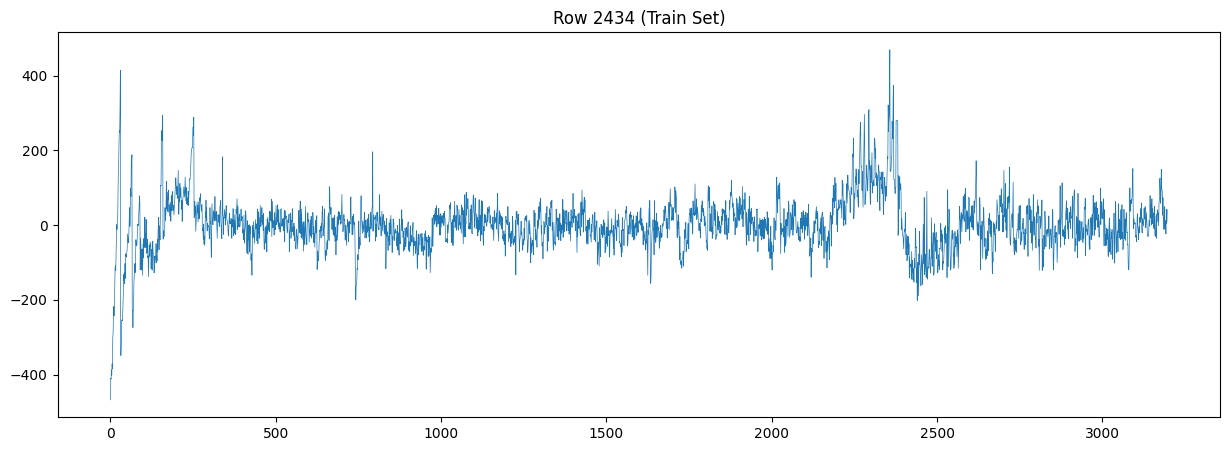

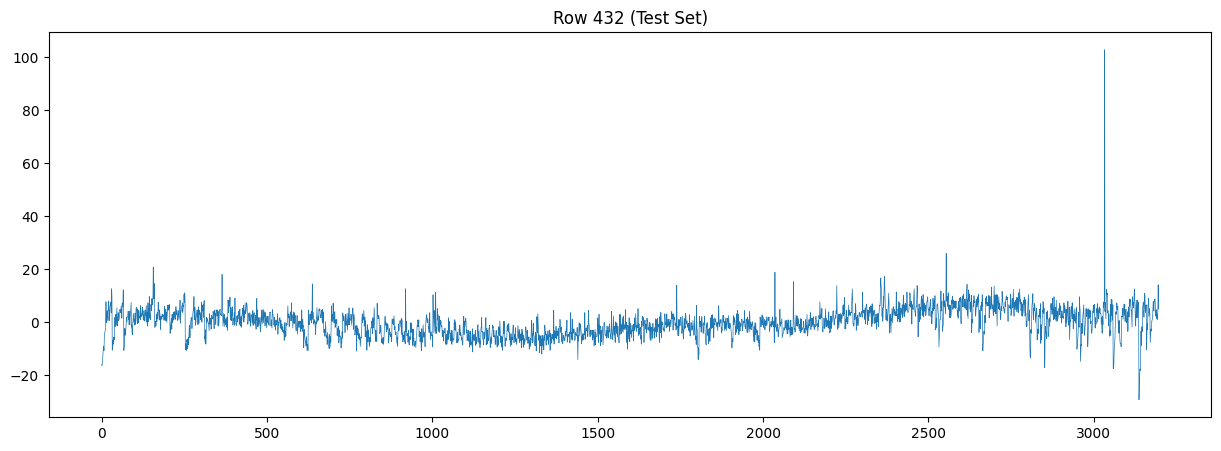

In [28]:
# plot flux values from a random row

# train set
random_index = np.random.randint(0, len(train_df))
flux_values = train_df.iloc[random_index, 1:].values
plt.figure(figsize=(15,5))
plt.plot(flux_values, linestyle='solid', linewidth=0.5)
plt.title(f"Row {random_index} (Train Set)")
plt.show()

# test set
random_index = np.random.randint(0, len(test_df))
flux_values = test_df.iloc[random_index, 1:].values
plt.figure(figsize=(15,5))
plt.plot(flux_values, linestyle='solid', linewidth=0.5)
plt.title(f"Row {random_index} (Test Set)")
plt.show()

# Anomaly detection: mixed dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [29]:
# new sets without "label" column
X_train = train_df.iloc[:, 1:].values
X_test = test_df.iloc[:, 1:].values

# normalize data
X_min = X_train.min(axis=0)
X_max = X_train.max(axis=0)
X_train = (X_train - X_min) / (X_max - X_min)
X_test = (X_test - X_min) / (X_max - X_min)

In [30]:
# autoencoder dimensions
input_dim = X_train.shape[1]
encoding_dim = 128

input_layer = Input(shape=(input_dim,))

# build autoencoder model
encoded = Dense(512, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(512, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [32]:
# train model
autoencoder.fit(X_train, X_train, epochs=20, batch_size=64, validation_data=(X_test, X_test), verbose=1)

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 1.1004e-04 - val_loss: 5.5793e-05
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 6.2170e-05 - val_loss: 7.1191e-05
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 1.0401e-04 - val_loss: 5.8569e-05
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 5.2978e-05 - val_loss: 5.7784e-05
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 8.3761e-05 - val_loss: 5.8176e-05
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 1.1089e-04 - val_loss: 5.5701e-05
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 7.3939e-05 - val_loss: 5.6825e-05
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 9.5250e-05 - val_loss: 5.1277e-05
Epoch 9/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 6.4882e-05 - val_loss: 7.7395e-05
Epoch 10/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 4.2829e-05 - val_loss: 6.8785e-05
Epoch 11/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 7.2760e-0

In [76]:
# predict flux behavior of the test set, compare with actual test set, compute avg error
X_test_predicted = autoencoder.predict(X_test)
pred_error = np.mean(np.abs(X_test - X_test_predicted), axis=1)

# list top 10 biggest errors as anomalies
sorted = np.argsort(pred_error)[::-1]
anomalies = sorted[:10]
print("top 10 anomalies found in test set: ")
for i, idx in enumerate(anomalies):
    print(f"Rank {i+1}: Star {idx} - Error: {pred_error[idx]:.6f}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
top 10 anomalies found in test set: 
Rank 1: Star 230 - Error: 0.100705
Rank 2: Star 445 - Error: 0.052538
Rank 3: Star 485 - Error: 0.038359
Rank 4: Star 372 - Error: 0.008751
Rank 5: Star 124 - Error: 0.005855
Rank 6: Star 417 - Error: 0.005562
Rank 7: Star 460 - Error: 0.005202
Rank 8: Star 415 - Error: 0.003172
Rank 9: Star 262 - Error: 0.002687
Rank 10: Star 448 - Error: 0.002663


As we can see, the errors in our model's predictions are very low indicating a very good accuracy of the model. Nevertheless we can analyze the top 3 anomalies (error > 1%)

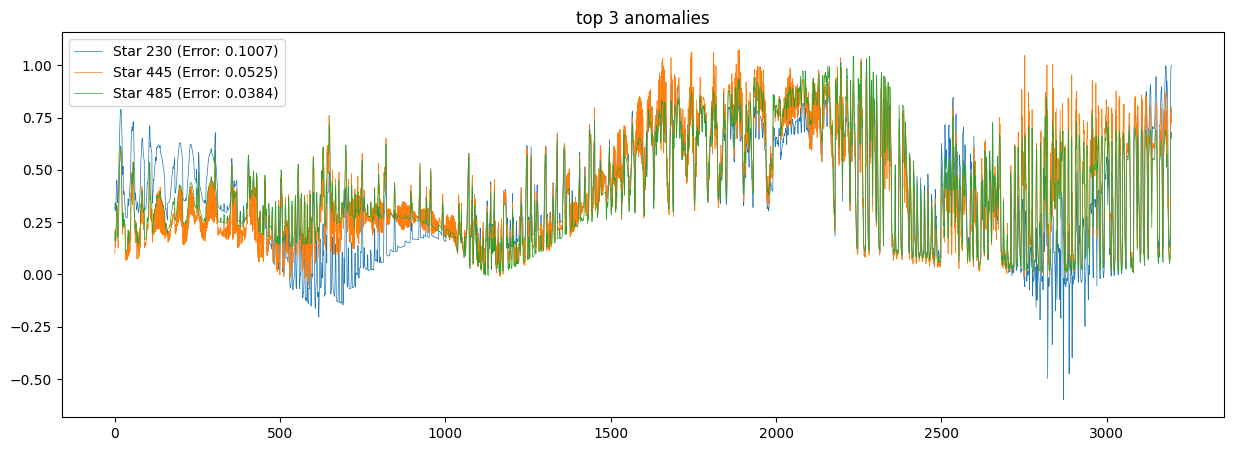

In [77]:
# plot top 3 anomalies (error > 0.01)
plt.figure(figsize=(15, 5))
for i, idx in enumerate(anomalies[:3]):
    plt.plot(X_test[idx], linewidth=0.5, label=f"Star {idx} (Error: {pred_error[idx]:.4f})")

plt.title("top 3 anomalies")
plt.legend()
plt.show()

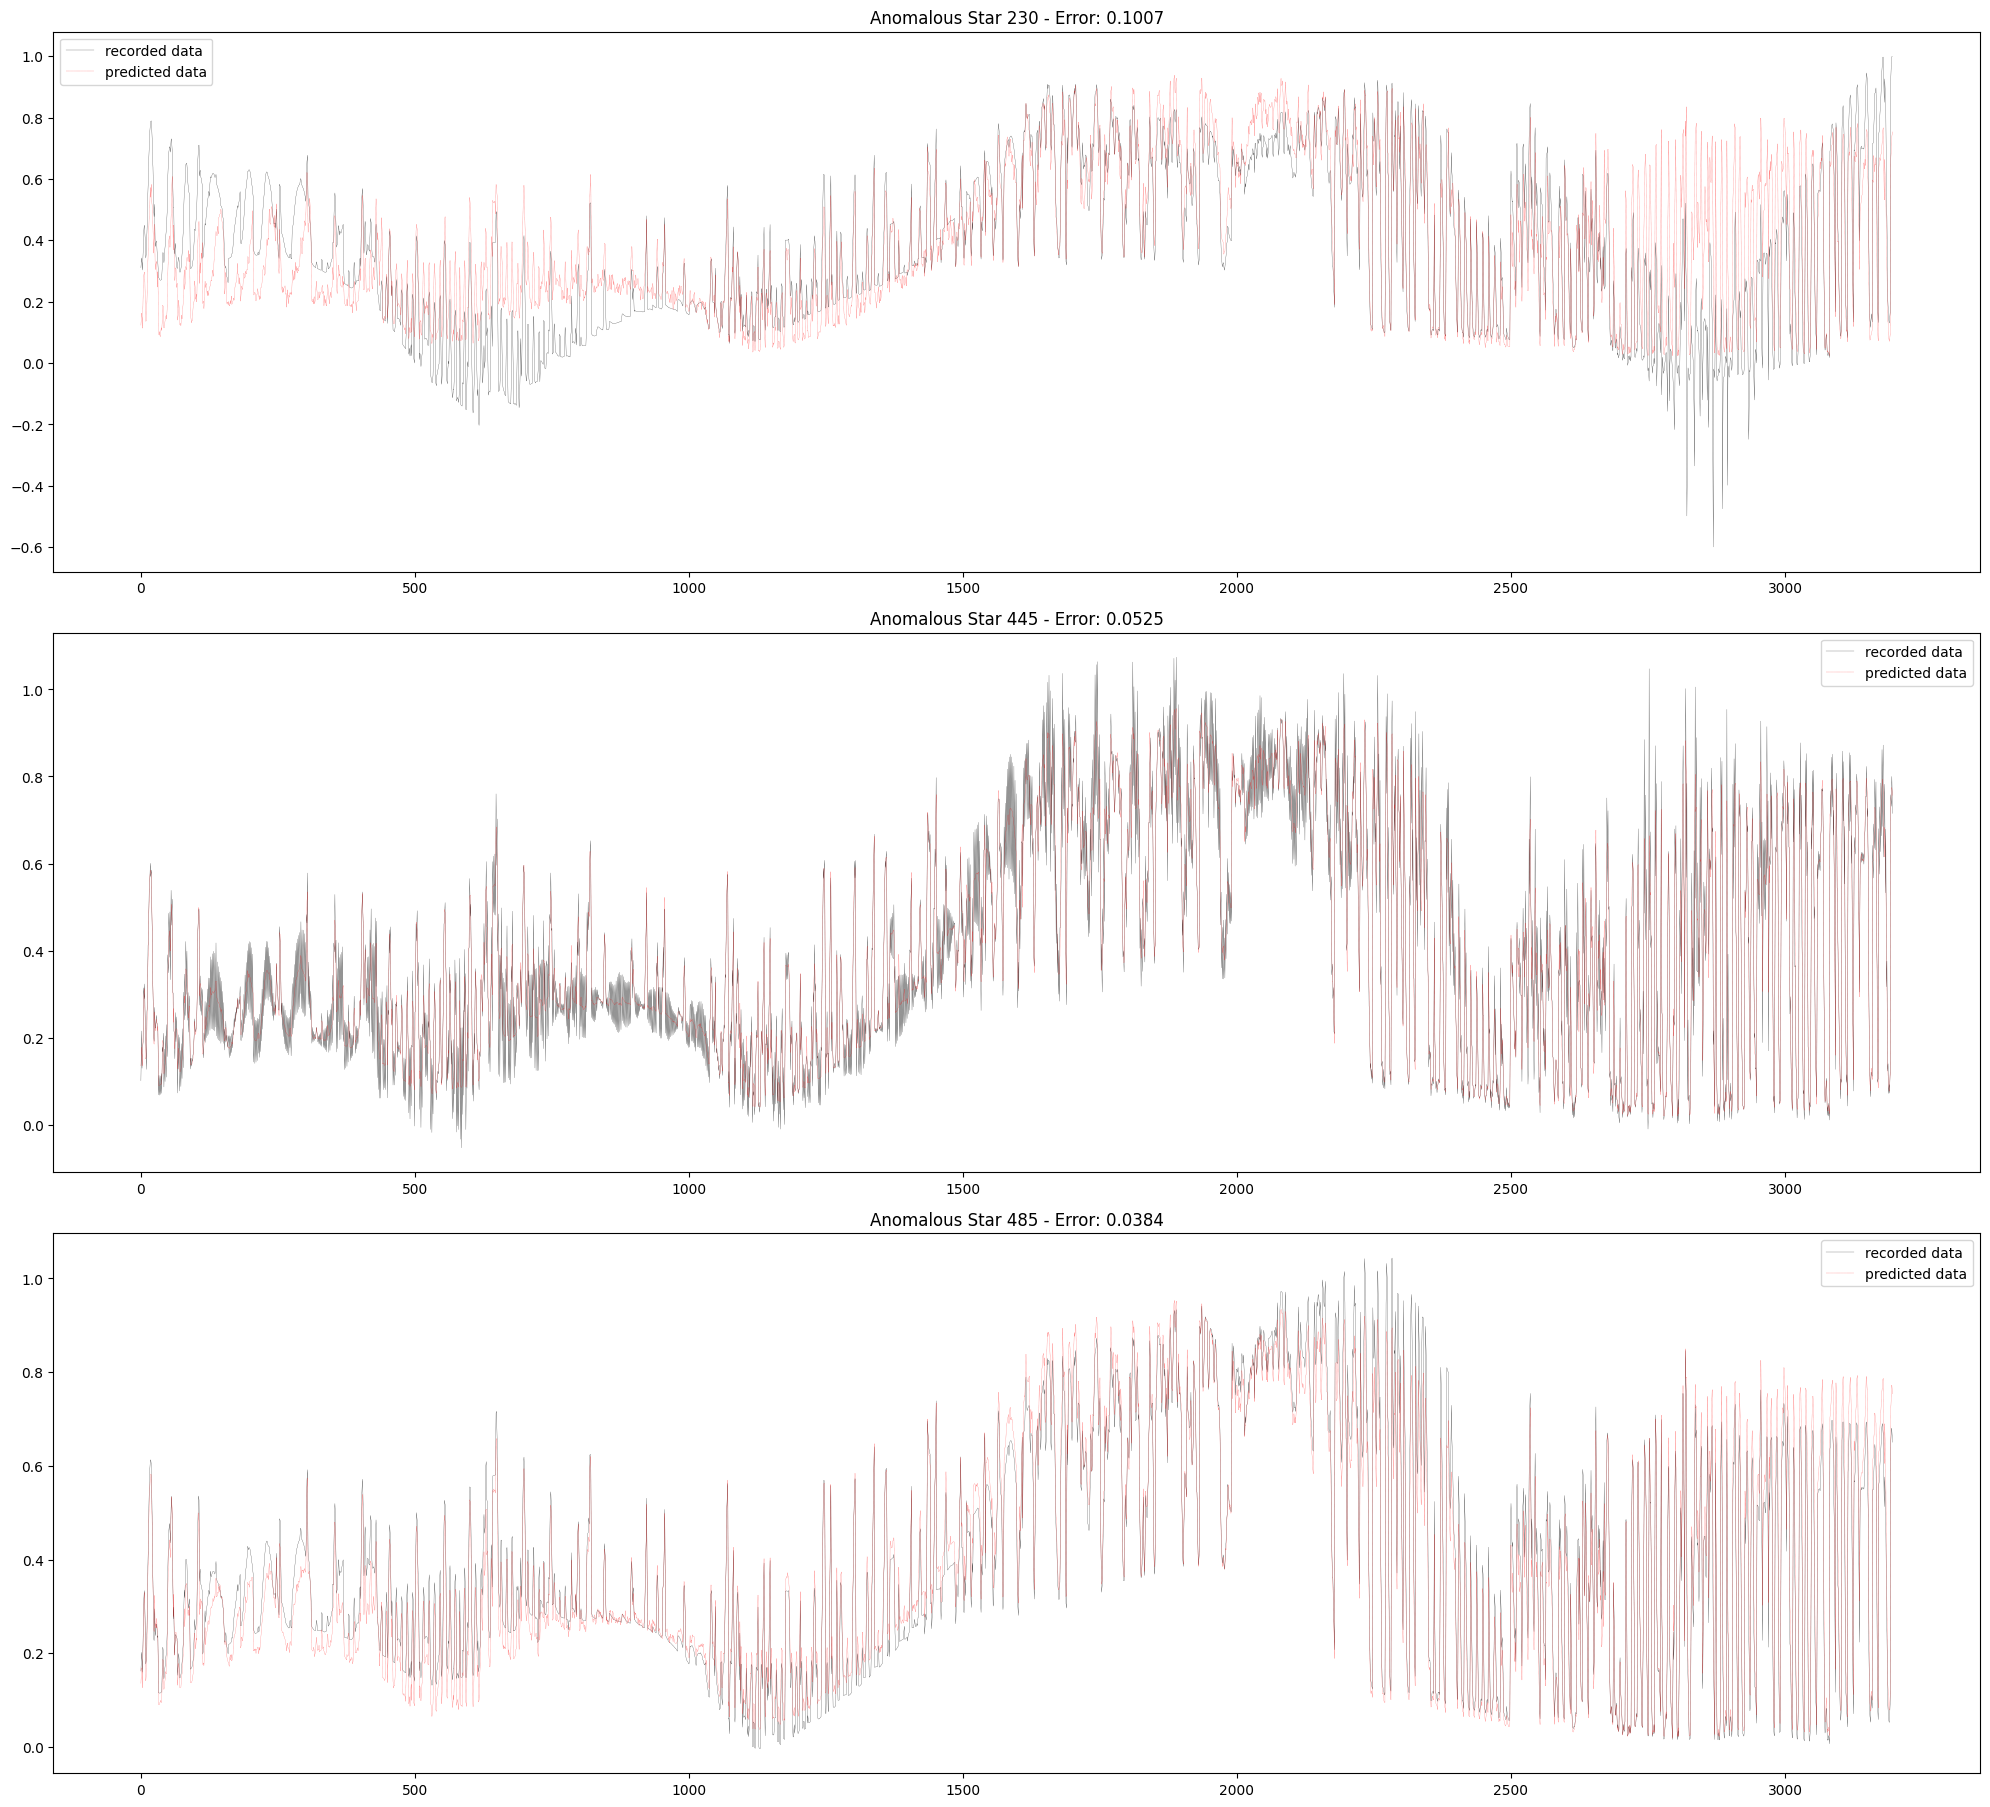

In [78]:
# visualize anomalies compared to recorderd data

plt.figure(figsize=(20, 60))
for i, idx in enumerate(anomalies[:3]):
    original = X_test[idx]
    pred = X_test_predicted[idx]
    error = np.abs(original - pred)

    plt.subplot(len(anomalies), 1, i + 1)
    plt.plot(original, color='black', linewidth=0.15, label="recorded data")
    plt.plot(pred, color='red', linestyle="dashed", linewidth=0.15, label="predicted data")

    plt.title(f"Anomalous Star {idx} - Error: {pred_error[idx]:.4f}")
    plt.legend()

plt.tight_layout()
plt.show()

In [84]:
y_test = test_df.iloc[:, 0].values

top3 = anomalies[:3]
top3labels =  [y_test[idx] for idx in top3]

for i, (idx, label) in enumerate(zip(top3, top3labels)):
    label_text = "Exoplanet" if label == 2 else "Non-Exoplanet"
    print(f"Top {i+1} Anomaly (Index {idx}) - Label: {label_text}")

Top 1 Anomaly (Index 230) - Label: Non-Exoplanet
Top 2 Anomaly (Index 445) - Label: Non-Exoplanet
Top 3 Anomaly (Index 485) - Label: Non-Exoplanet


In [85]:
exoplanets = np.sum(y_test == 2)
non_exoplanets = np.sum(y_test == 1)

print("confirmed exoplanet stars in test set: ", exoplanets)
print("non-exoplanet stars in test set: ", non_exoplanets)

confirmed exoplanet stars in test set:  5
non-exoplanet stars in test set:  565


In [86]:
y_train = train_df.iloc[:, 0].values

exoplanets = np.sum(y_train == 2)
non_exoplanets = np.sum(y_train == 1)

print("confirmed exoplanet stars in train set: ", exoplanets)
print("non-exoplanet stars in train set: ", non_exoplanets)

confirmed exoplanet stars in train set:  37
non-exoplanet stars in train set:  5050


# Conclusion / ideas
1. Since we only have very few confirmed exoplanet stars on the data, it will be hard to identify which non-confirmed exoplanet stars can be potential exoplanets
2. The very miniscule errors in prediction can be used for further research:
What causes those particular stars to have slight anomalies compared to other stars? If our model could predict with over 99% accuracy for most of the data, the top 3 anomalies with 10%/5%/3% errors could have been affected by other factors (strange thermodynamics / extreme conditions that cause disturbance in data-recording / etc..)
3. Besides machine learning applications, we can perform traditional spectral analysis on this dataset